In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Paired')

In [167]:
data_clean = pd.read_csv('data_clean.csv')

#data_clean['Continent'] = data_clean['Region']
asia = ['South Asia', 'Middle East', 'Southeast Asia', 'East Asia', 'Central Asia']
europe = ['Balkans', 'Southern Europe', 'Eastern Europe', 'Western Europe', 'Northern Europe']
africa = ['North Africa', 'Southern Africa', 'West Africa', 'East Africa', 'Central Africa']
north_america = ['Caribbean', 'Central America', 'North America']
south_america = ['South America']

#for index in data_clean.index:
#    if data_clean.at[index,'Region'] in asia:
#        data_clean.at[index,'Continent'] = 'Asia'
#    elif data_clean.at[index,'Region'] in europe:
#        data_clean.at[index,'Continent'] = 'Europe'
#    elif data_clean.at[index,'Region'] in africa:
#        data_clean.at[index,'Continent'] = 'Africa'
#    elif data_clean.at[index,'Region'] in north_america:
#        data_clean.at[index,'Continent'] = 'North America'
#    elif data_clean.at[index,'Region'] in south_america:
#        data_clean.at[index,'Continent'] = 'South America'
#    else:
#        data_clean.at[index,'Continent'] = 'Oceania'

#del index
multi_index = pd.MultiIndex.from_frame(data_clean[['Continent','Country','Region']])
data_clean = data_clean.set_index(multi_index)
data_clean = data_clean.drop(columns = ['Continent', 'Region'])
print(data_clean.head())

                                      Country         Sex  Year  \
Continent Country     Region                                      
Asia      Afghanistan South Asia  Afghanistan  Both sexes  1975   
                      South Asia  Afghanistan        Male  1975   
                      South Asia  Afghanistan      Female  1975   
                      South Asia  Afghanistan  Both sexes  1976   
                      South Asia  Afghanistan        Male  1976   

                                    Obesity (%)  BMI  
Continent Country     Region                          
Asia      Afghanistan South Asia  0.5 [0.2-1.1]  0.5  
                      South Asia  0.2 [0.0-0.6]  0.2  
                      South Asia  0.8 [0.2-2.0]  0.8  
                      South Asia  0.5 [0.2-1.1]  0.5  
                      South Asia  0.2 [0.0-0.7]  0.2  


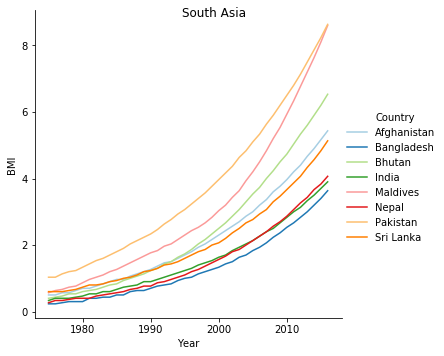

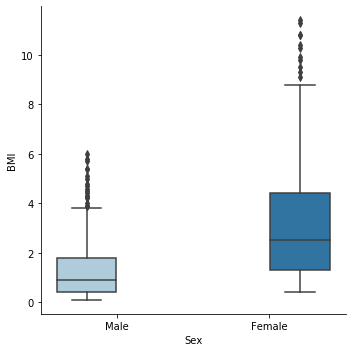

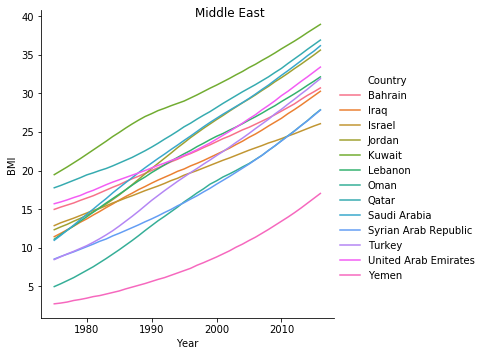

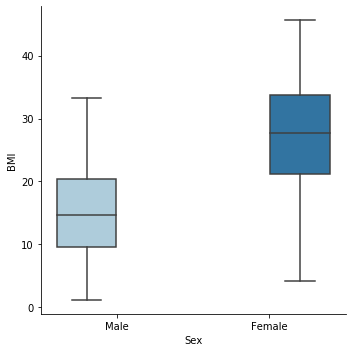

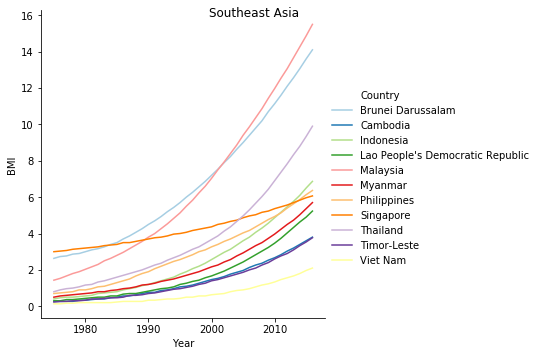

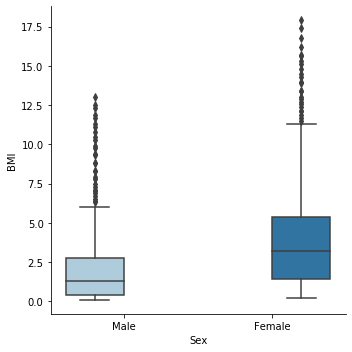

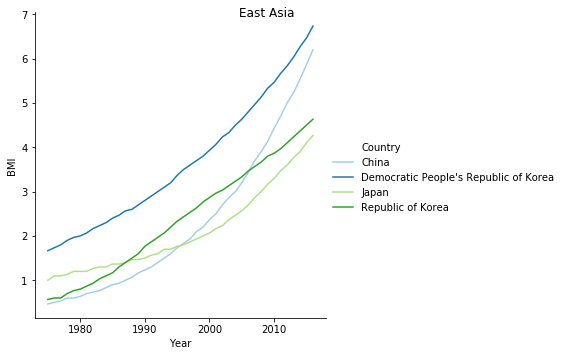

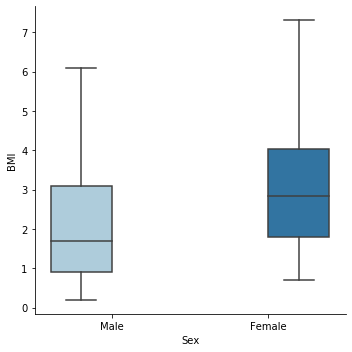

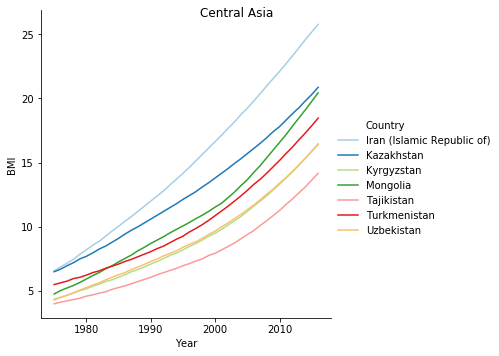

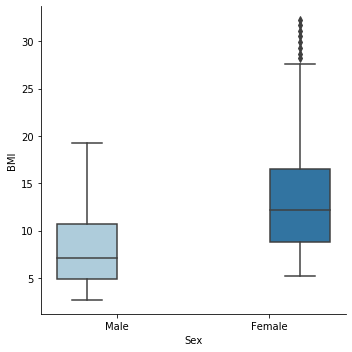

In [179]:
for region in asia:
    df_region = data_clean.xs(['Asia', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle(str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'box',
                   x = 'Sex', y = 'BMI', hue = 'Sex')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2886: PerformanceWarning: indexing past lexsort depth may impact performance.
  return runner(coro)


                                                              Sex    Year  \
Continent Country                               Region                      
Asia      Democratic People's Republic of Korea East Asia    Male  1975.0   
                                                East Asia  Female  1975.0   
                                                East Asia    Male  1976.0   
                                                East Asia  Female  1976.0   
                                                East Asia    Male  1977.0   

                                                             Obesity (%)  BMI  
Continent Country                               Region                         
Asia      Democratic People's Republic of Korea East Asia  0.8 [0.2-2.1]  0.8  
                                                East Asia  2.4 [0.8-5.3]  2.4  
                                                East Asia  0.9 [0.2-2.2]  0.9  
                                                East Asia  2

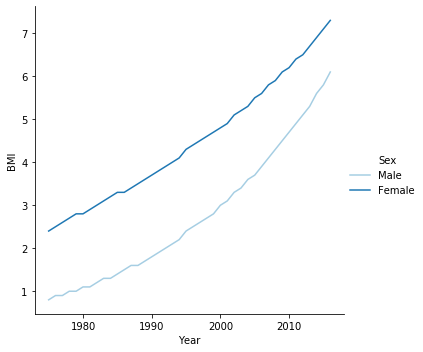

In [175]:
north_korea = data_clean.xs(['Asia','Democratic People\'s Republic of Korea', 'East Asia']).drop(columns = 'Country')
north_korea = north_korea.mask(north_korea['Sex'] == 'Both sexes').dropna()
print(north_korea.head())
sns.relplot(data = north_korea, kind = 'line',
           x = 'Year', y = 'BMI', hue = 'Sex')